# Forecasting Timeseries Data Using Facebook FbProphet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fbprophet

In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplo

In [2]:
df = pd.read_csv("C:\\Users\\Imran\\Desktop\\monthly-milk-production-pounds.csv")

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
df.keys()

Index(['Month', 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75'], dtype='object')

In [6]:
df.isnull().sum()

Month                                                       0
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    1
dtype: int64

In [7]:
df.drop(168, axis=0, inplace=True)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df.columns = ['ds','y']

In [11]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [12]:
df['ds']=pd.to_datetime(df['ds'])

In [13]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

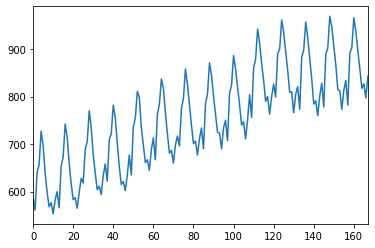

In [14]:
df['y'].plot()

In [15]:
from fbprophet import Prophet

In [16]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [17]:
#initlize the model
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
#Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [21]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [22]:
#Prediction
prediction = model.predict(future_dates)

In [23]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.745675,576.742167,596.347712,606.745675,606.745675,-20.130099,-20.130099,-20.130099,-20.130099,-20.130099,-20.130099,0.0,0.0,0.0,586.615577
1,1962-02-01,608.470805,536.130052,555.320883,608.470805,608.470805,-62.516410,-62.516410,-62.516410,-62.516410,-62.516410,-62.516410,0.0,0.0,0.0,545.954394
2,1962-03-01,610.028986,631.599723,651.343308,610.028986,610.028986,31.404247,31.404247,31.404247,31.404247,31.404247,31.404247,0.0,0.0,0.0,641.433233
3,1962-04-01,611.754116,648.258399,668.923870,611.754116,611.754116,46.747451,46.747451,46.747451,46.747451,46.747451,46.747451,0.0,0.0,0.0,658.501566
4,1962-05-01,613.423596,710.976694,730.638321,613.423596,613.423596,108.087876,108.087876,108.087876,108.087876,108.087876,108.087876,0.0,0.0,0.0,721.511472


In [24]:
prediction.keys()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [25]:
prediction[['ds','yhat','yhat_lower','yhat_upper',]].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.661138,804.279421,827.403313
529,1976-11-27,818.781141,808.203680,830.244088
530,1976-11-28,822.075513,811.319289,832.528211
531,1976-11-29,825.484020,814.172841,836.618129
532,1976-11-30,828.939423,818.687043,840.242503


In [26]:
prediction[['ds','yhat','yhat_lower','yhat_upper',]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.615577,576.742167,596.347712
1,1962-02-01,545.954394,536.130052,555.320883
2,1962-03-01,641.433233,631.599723,651.343308
3,1962-04-01,658.501566,648.258399,668.923870
4,1962-05-01,721.511472,710.976694,730.638321


# Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. 
The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

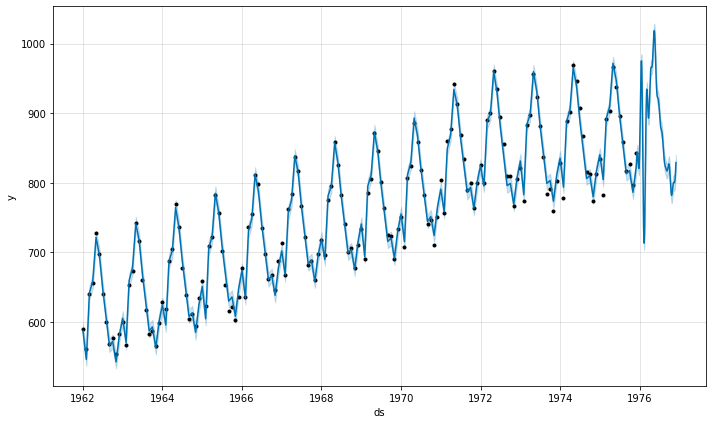

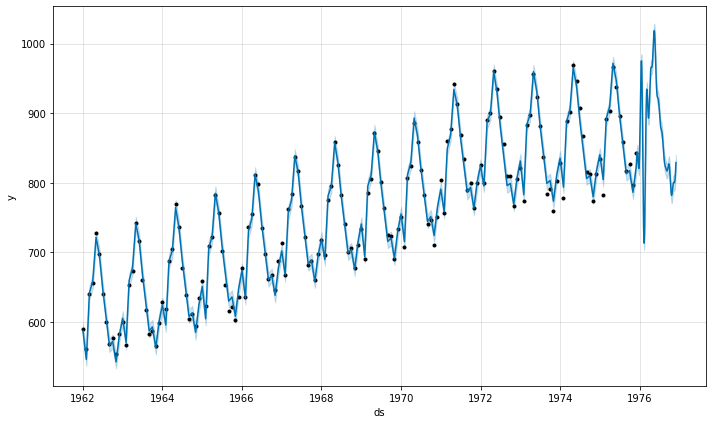

In [27]:
#plot the predicted projection
model.plot(prediction)

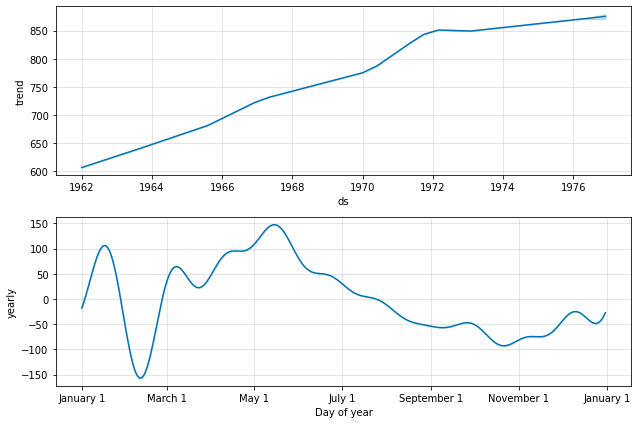

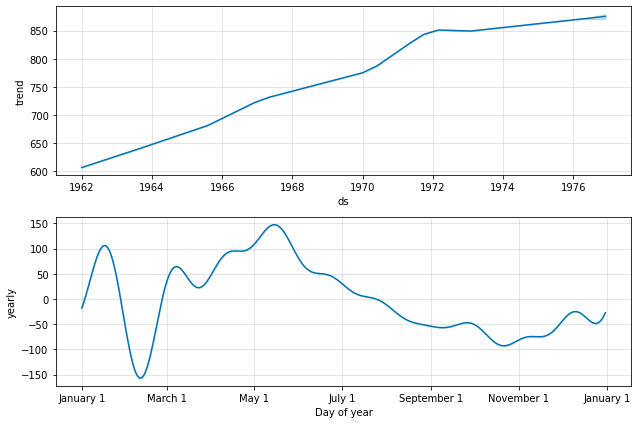

In [28]:
#Visulize each component (Trends, Weekly)
model.plot_components(prediction)

# Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

    horizon the forecast horizon
    initial the size of the initial training period
    period the spacing between cutoff dates



In [29]:
df.shape

(168, 2)

In [30]:
from fbprophet.diagnostics import cross_validation

In [31]:
df_cv = cross_validation(model, horizon='365 days', period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [32]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,627.264692,625.866795,629.192292,622.0,1965-01-22
1,1965-03-01,711.399996,705.630499,717.724118,709.0,1965-01-22
2,1965-04-01,727.193440,714.130559,739.265281,722.0,1965-01-22
3,1965-05-01,793.131715,772.755649,813.261484,782.0,1965-01-22
4,1965-06-01,761.304300,732.319298,790.980172,756.0,1965-01-22


# Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), 
Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [34]:
from fbprophet.diagnostics import performance_metrics
def_performance=performance_metrics(df_cv)

In [35]:
def_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,250.595473,15.830208,12.204409,0.015667,0.013241,0.36
1,41 days,248.418503,15.761298,12.115616,0.015589,0.013241,0.36
2,42 days,263.624334,16.236512,12.584645,0.016240,0.013241,0.36
3,43 days,265.303255,16.288132,12.773565,0.016538,0.013241,0.36
4,46 days,251.349795,15.854015,12.465913,0.016120,0.013241,0.36


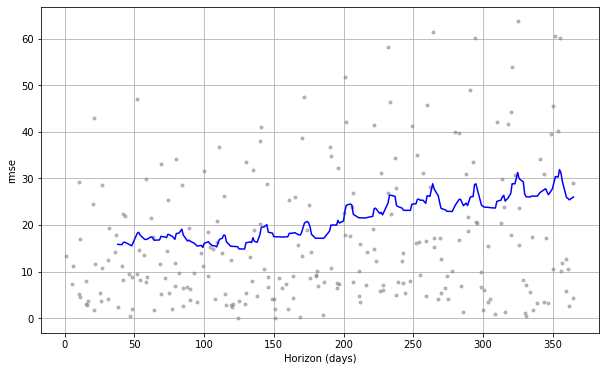

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')